# Mínimos cuadrados

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize

Vamos a hacer mínimos cuadrados ajustando los datos a una parábola

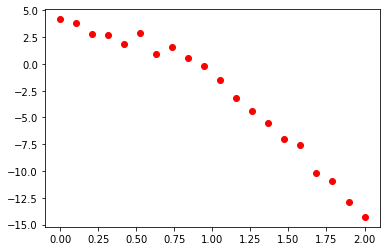

In [2]:
# se define el polinomio -5x^2 + x + 3
f = np.poly1d([-5, 1, 3])

# se muestrean 20 datos con ruido del polinomio
n = 20
x = np.linspace(0, 2, n)
y = f(x) + 0.5*np.random.normal(size=n)
xn = np.linspace(0, 2, 200)

# se grafican los datos
plt.plot(x, y, 'or')
plt.show()

In [3]:
# se arma la matriz A y se asigna el vector b
A = np.c_[x**2, x, np.ones(n)]
b = y
A

array([[0.        , 0.        , 1.        ],
       [0.01108033, 0.10526316, 1.        ],
       [0.04432133, 0.21052632, 1.        ],
       [0.09972299, 0.31578947, 1.        ],
       [0.17728532, 0.42105263, 1.        ],
       [0.27700831, 0.52631579, 1.        ],
       [0.39889197, 0.63157895, 1.        ],
       [0.54293629, 0.73684211, 1.        ],
       [0.70914127, 0.84210526, 1.        ],
       [0.89750693, 0.94736842, 1.        ],
       [1.10803324, 1.05263158, 1.        ],
       [1.34072022, 1.15789474, 1.        ],
       [1.59556787, 1.26315789, 1.        ],
       [1.87257618, 1.36842105, 1.        ],
       [2.17174515, 1.47368421, 1.        ],
       [2.49307479, 1.57894737, 1.        ],
       [2.8365651 , 1.68421053, 1.        ],
       [3.20221607, 1.78947368, 1.        ],
       [3.5900277 , 1.89473684, 1.        ],
       [4.        , 2.        , 1.        ]])

In [4]:
Amp1 = np.linalg.inv(A.T @ A) @ A.T
Amp2 = np.linalg.pinv(A)
np.max(np.abs(Amp1 - Amp2))

4.218847493575595e-15

In [5]:
coef1 = Amp1 @ b
coef1

array([-4.13224204, -0.92601037,  3.74242188])

In [15]:
%timeit np.linalg.lstsq(A, b, rcond=None)
coef2 = np.linalg.lstsq(A, b, rcond=None)[0]
coef2

38.1 µs ± 1.94 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


array([-4.13224204, -0.92601037,  3.74242188])

In [7]:
coef3 = np.polyfit(x, y, 2)
coef3

array([-4.13224204, -0.92601037,  3.74242188])

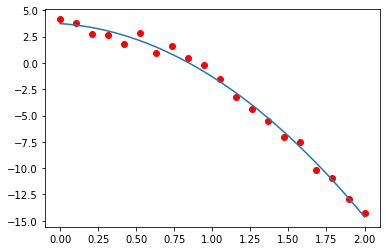

In [8]:
yn = np.polyval(coef3, xn)

plt.plot(x, y, 'or')
plt.plot(xn, yn)
plt.show()

Ahora usando una regresión no lineal

In [9]:
def f(x, a, b, c):
    return a*x**2 + b*x + c

def error(p, x, y):
    return y - f(x, *p)

coef_ini = [1, 1, 1]

coef4, pcov = optimize.leastsq(error, coef_ini, args=(x, y))
coef4

array([-4.13224206, -0.92601033,  3.74242186])

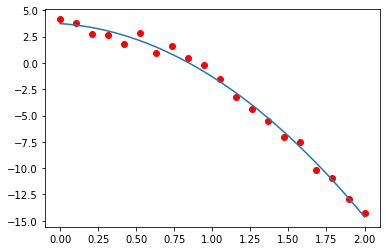

In [10]:
yn = f(xn, *coef4)

plt.plot(x, y, 'or')
plt.plot(xn, yn)
plt.show()

In [11]:
%timeit optimize.leastsq(error, coef_ini, args=(x, y))

102 µs ± 2.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
def MSE(p, x, y):
    return sum(error(p, x, y)**2)

coef5 = optimize.minimize(MSE, coef_ini, method='L-BFGS-B', args=(x, y))
print(coef5.x)

[-4.13224212 -0.9260099   3.74242128]


In [13]:
coef6, pcov = optimize.curve_fit(f, x, y)
coef6

array([-4.13224204, -0.92601038,  3.74242188])